

**Automatic differentiation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

data = pd.read_csv('sampledata.csv',encoding="ISO-8859-1")
data

,Name,Sport,Nationality,Age,Wt kg,Ht
0,ABBAS Muhammad,Alpine Skiing,Pakistan,23,55.0,168.0
1,ABBOTT Jeremy,Figure Skating,United States,24,NaN,175.0
2,ABLAEV Enver,Freestyle Skiing,Ukraine,30,68.0,169.0
3,ABRAMASHVILI Iason,Alpine Skiing,Georgia,21,82.0,176.0
4,ABRAMENKO Evgeny,Biathlon,Belarus,22,81.0,180.0
...,...,...,...,...,...,...
2601,ZUEV Stepan,Alpine Skiing,Russia,21,90.0,189.0
2602,ZURBRIGGEN Silvan,Alpine Skiing,Switzerland,28,94.0,185.0
2603,ZUZULOVA Veronika,Alpine Skiing,Slovakia,25,72.0,172.0
2604,ZVARICOVA Veronika,Biathlon,Czech Republic,21,62.0,176.0


In [2]:
import torch
def describe_tensor(tensor, Name= '', Age=''):
  print('name: ', Name)
  print('age', 20)
  print('data : ', tensor.data)
  print('requires_grad : ', tensor.requires_grad)
  print('grad: ', tensor.grad)
  print('grad_fn: ', tensor.grad_fn)
  print('is_leaf: ', tensor.is_leaf)
  print(torch.tensor(2))

In [3]:
# create a tensor x
x = torch.tensor(1.0)
describe_tensor(x, Name='ABBOTT Jeremy')

name:  ABBOTT Jeremy
age 20
data :  tensor(1.)
requires_grad :  False
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)


In [4]:
# create a tensor y
y = torch.tensor(2.0)
describe_tensor(y, Name ='ABLAEV Enver')

name:  ABLAEV Enver
age 20
data :  tensor(2.)
requires_grad :  False
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)


In [5]:
# Create z as the multiplicative outcome of x * y
z = x * y
describe_tensor(z, Name='ZUEV Stepan')
z.type

name:  ZUEV Stepan
age 20
data :  tensor(2.)
requires_grad :  False
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)


<function Tensor.type>

In [6]:
# make x track gradients
x = torch.tensor(1.0, requires_grad=True)
z = x * y
describe_tensor(z)

name:  
age 20
data :  tensor(2.)
requires_grad :  True
grad:  None
grad_fn:  <MulBackward0 object at 0x7f634021e6a0>
is_leaf:  False
tensor(2)


<ipython-input-2-8deacd0b3767>:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print('grad: ', tensor.grad)


In [7]:
# call .backward() now on z
z.backward()

# Now describe each tensor x, y and z
describe_tensor(x, 'x')
describe_tensor(y, 'y')
describe_tensor(z, 'z')

name:  x
age 20
data :  tensor(1.)
requires_grad :  True
grad:  tensor(2.)
grad_fn:  None
is_leaf:  True
tensor(2)
name:  y
age 20
data :  tensor(2.)
requires_grad :  False
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)
name:  z
age 20
data :  tensor(2.)
requires_grad :  True
grad:  None
grad_fn:  <MulBackward0 object at 0x7f62c74b4550>
is_leaf:  False
tensor(2)


<ipython-input-2-8deacd0b3767>:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print('grad: ', tensor.grad)


In [8]:
x = torch.ones(3, requires_grad=True)
y = 3 * torch.ones(3)
z = x * y
describe_tensor(x, 'x')
describe_tensor(y, 'y')
describe_tensor(z, 'z')
# Backprop with the explicit gradient
z.backward(torch.ones(3))
print('AFTER BACKWARD:')
describe_tensor(x, 'x') # now this should show a grad value of [3, 3, 3]

name:  x
age 20
data :  tensor([1., 1., 1.])
requires_grad :  True
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)
name:  y
age 20
data :  tensor([3., 3., 3.])
requires_grad :  False
grad:  None
grad_fn:  None
is_leaf:  True
tensor(2)
name:  z
age 20
data :  tensor([3., 3., 3.])
requires_grad :  True
grad:  None
grad_fn:  <MulBackward0 object at 0x7f62c74b4c40>
is_leaf:  False
tensor(2)
AFTER BACKWARD:
name:  x
age 20
data :  tensor([1., 1., 1.])
requires_grad :  True
grad:  tensor([3., 3., 3.])
grad_fn:  None
is_leaf:  True
tensor(2)


<ipython-input-2-8deacd0b3767>:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print('grad: ', tensor.grad)


### **Dataset creation**

In [9]:
import torch  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets  

In [10]:
#create a dataset by using make_blobs()
no_of_points=50
datasets.make_blobs()  

(array([[  1.51222507,  11.20404835],
        [ -1.71999602,  -2.85887577],
        [ -9.78984744,   0.03248528],
        [  2.14256305,   9.09864109],
        [ -2.64228183,  -3.26118604],
        [  0.5642818 ,   9.11575158],
        [  2.45900045,  10.25627788],
        [  0.06422168,  -3.07646073],
        [ -9.47730686,  -0.26690987],
        [ -7.08093613,   2.42798222],
        [ -7.7573169 ,  -1.16182295],
        [ -7.70699179,  -0.05124118],
        [ -0.05615395,   9.3088615 ],
        [  3.63202578,  11.56172199],
        [ -6.08585635,   0.64815502],
        [  2.09880349,   9.26215564],
        [ -1.64739784,  -3.12284713],
        [ -8.01427941,  -1.77456852],
        [ -7.5436547 ,  -2.49818178],
        [ -7.41500915,   0.05625307],
        [ -0.87312105,  -3.56388119],
        [  1.55989346,  10.03036672],
        [ -7.59344858,   0.56800865],
        [ -1.03698723,  -2.60887481],
        [  2.86703376,   9.8380161 ],
        [ -8.42004061,  -2.03631738],
        [  2

In [11]:
# create a nested list
centers=[[-0.5,0.5],[0.5,-0.5]]  
centers

[[-0.5, 0.5], [0.5, -0.5]]

In [12]:
x,y=datasets.make_blobs()  
x,y=datasets.make_blobs(n_samples=no_of_points,random_state=123,centers=centers,cluster_std=0.4)  


In [13]:
print(x)

[[ 0.09655585  0.2444392 ]
 [ 0.6257088  -1.03050618]
 [-0.67759278  0.32625949]
 [ 1.06691962 -0.17710539]
 [-0.93425224  0.89893818]
 [-0.36456438  0.4952678 ]
 [ 0.33865358 -0.55041183]
 [-0.60224775 -0.61943564]
 [-0.65635992  0.72952234]
 [ 1.09825765 -0.07224293]
 [-0.3868086  -0.10251789]
 [ 0.16499331 -1.1423851 ]
 [ 1.164381   -0.17707673]
 [ 0.96488162 -0.93888122]
 [-1.00155227  0.2448994 ]
 [ 0.38237203  1.37471444]
 [-0.82214661 -0.1910678 ]
 [ 1.33484534 -0.43422351]
 [-0.85181454  0.61345093]
 [ 0.0063745   0.15330384]
 [-1.20861324  0.22004911]
 [ 0.19091651 -0.18205493]
 [-0.01763413 -0.91551528]
 [ 0.37409674 -0.93436096]
 [-0.55602749  0.15529804]
 [ 0.96008222 -1.00694082]
 [-0.13715792 -0.07147228]
 [ 0.02067954 -0.42019037]
 [-0.20505257  1.09629281]
 [ 0.20701521 -0.98500925]
 [ 0.57241405 -0.02885522]
 [ 0.85628256  0.20195447]
 [ 1.19748489 -0.81922509]
 [-0.87433355  0.97033162]
 [ 0.06617284 -1.04538862]
 [ 0.3659957  -0.08755422]
 [-0.09837844  0.65447456]
 

In [14]:
print(y)

[0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 1 0 0 0 0 0 1]


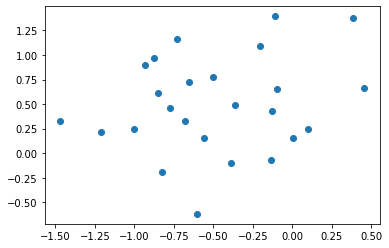

In [15]:
# plot and visualize it using plt.scatter() function.
plt.scatter(x[y==0,0],x[y==0,1])  


In [16]:
xdata=torch.Tensor(x)
xdata
ydata=torch.Tensor(y)
ydata  


tensor([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

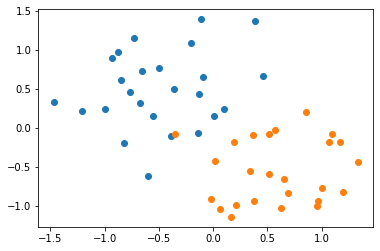

In [17]:
plt.scatter(x[y==0,0], x[y==0,1])

plt.scatter(x[y==1,0], x[y==1,1])
plt.show()

## **Data loader**


In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



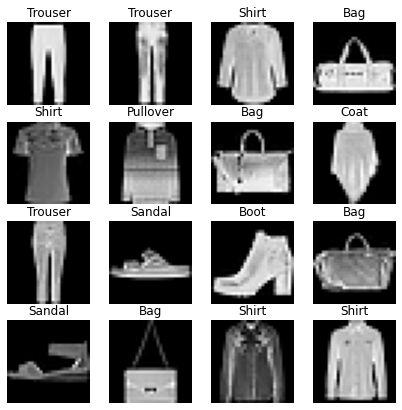

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Boot",
}
figure = plt.figure(figsize=(7, 7))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


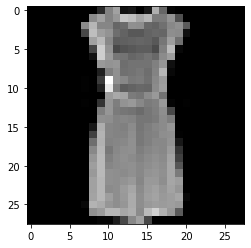

Label: 3


In [20]:
#Preparing your data for training with DataLoaders

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")